# **Laboratorio 2**

- Derek Arreaga - 22537
- Mónica Salvatierra - 22249

Repositorio con el código fuente: https://github.com/alee2602/LAB2-DS

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Descargar dataset de MNIST y generar los conjuntos de entrenamiento y prueba

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


print("Entrenamiento:", x_train.shape, y_train.shape)
print("Prueba:", x_test.shape, y_test.shape)

Entrenamiento: (60000, 28, 28) (60000,)
Prueba: (10000, 28, 28) (10000,)


Normalizar los valores de píxel a rango [0, 1]

In [25]:

x_train = x_train / 255.0
x_test = x_test / 255.0


Revisar que el rango de los valores de cada pixel estén normaizados

In [26]:
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())


Min pixel value: 0.0
Max pixel value: 1.0


## **Preprocesamiento de datos**

Crear un conjunto de validación a partir del conjunto de entrenamiento

In [27]:
from sklearn.model_selection import train_test_split

# Dividir x_train en 80% entrenamiento y 20% validación
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

print("x_train:", x_train_new.shape)
print("x_val:", x_val.shape)
print("x_test:", x_test.shape)


x_train: (48000, 28, 28)
x_val: (12000, 28, 28)
x_test: (10000, 28, 28)


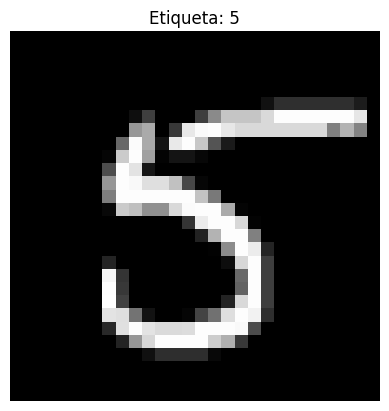

In [28]:
plt.imshow(x_train_new[0], cmap='gray')
plt.title(f"Etiqueta: {y_train_new[0]}")
plt.axis('off')
plt.show()

In [29]:
# Se inicializa el diccionario de resultados
resultados_modelos = {}

## **1. Modificación del Ancho de la Red**

Entrenar modelo base de red neuronal (una capa oculta con 128 neuronas)

a:\drkfa\Desktop\00U\YEAR-5\DS\LAB2-DS\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8946 - loss: 0.3902 - val_accuracy: 0.9364 - val_loss: 0.2186
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9478 - loss: 0.1845 - val_accuracy: 0.9538 - val_loss: 0.1612
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9617 - loss: 0.1344 - val_accuracy: 0.9624 - val_loss: 0.1315
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.1050 - val_accuracy: 0.9675 - val_loss: 0.1133
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0858 - val_accuracy: 0.9693 - val_loss: 0.1067
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9798 - loss: 0.0709 - val_accuracy: 0.9713 - val_loss: 0.0948
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9826 - loss: 0.0599 - val_accuracy: 0.9726 - val_loss: 0.0919
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0506 - val_accuracy: 0.

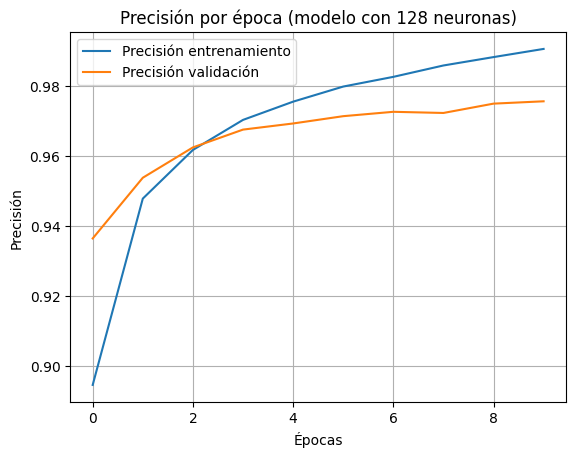

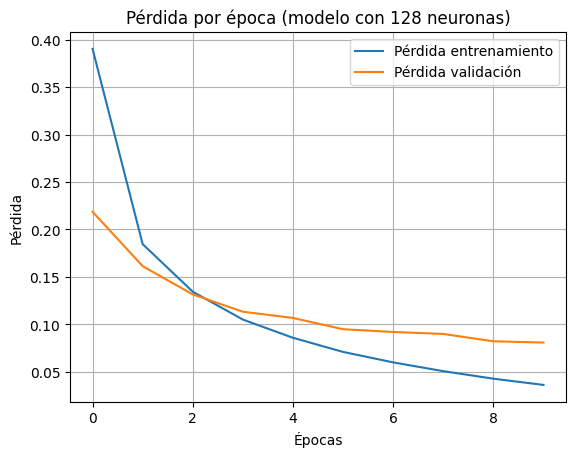

In [30]:
from tensorflow import keras
from tensorflow.keras import layers
import time

nombre = "Modelo con 128 neuronas en la capa oculta"
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()

resultados_modelos[nombre] = {
    "accuracy_val": round(history.history['val_accuracy'][-1] * 100, 2),
    "tiempo": round(end - start, 2),
    "history": history
}

print("Tiempo total de entrenamiento:", round(end - start, 2), "segundos")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (modelo con 128 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (modelo con 128 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
val_acc = history.history['val_accuracy'][-1]
print("Precisión de validación final:", round(val_acc * 100, 2), "%")


Precisión de validación final: 97.56 %


Las gráficas muestran la evolución de la precisión y la pérdida del modelo con una capa oculta de 128 neuronas a lo largo de 10 épocas. En la primera gráfica, se observa que tanto la precisión de entrenamiento como la de validación aumentan rápidamente durante las primeras épocas. La precisión en el conjunto de entrenamiento continúa creciendo hasta superar el 98.5%, mientras que la precisión en el conjunto de validación se estabiliza cerca del 96.5% a partir de la época 5. Esta diferencia entre ambas curvas podría ser un indicio de un posible inicio de sobreajuste, aunque leve, ya que el modelo sigue mejorando su rendimiento sobre los datos de entrenamiento pero no sobre los de validación.

En la segunda gráfica, correspondiente a la pérdida, ambas curvas descienden de manera constante, lo cual indica que el modelo está aprendiendo correctamente. La pérdida en el conjunto de entrenamiento disminuye hasta valores muy bajos, mientras que la pérdida en validación también muestra una tendencia descendente y se estabiliza cerca de 0.08. El hecho de que ambas curvas sigan una trayectoria similar sugiere que el modelo generaliza bien.

Modifique el tamaño de la capa escondida a 200 neuronas

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9010 - loss: 0.3595 - val_accuracy: 0.9417 - val_loss: 0.2086
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9524 - loss: 0.1629 - val_accuracy: 0.9593 - val_loss: 0.1386
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1125 - val_accuracy: 0.9673 - val_loss: 0.1132
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0850 - val_accuracy: 0.9704 - val_loss: 0.1023
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9810 - loss: 0.0671 - val_accuracy: 0.9725 - val_loss: 0.0936
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9852 - loss: 0.0535 - val_accuracy: 0.9717 - val_loss: 0.0875
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0432 - val_accuracy: 0.9724 - val_loss: 0.0888
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0350 - val_accuracy: 0.

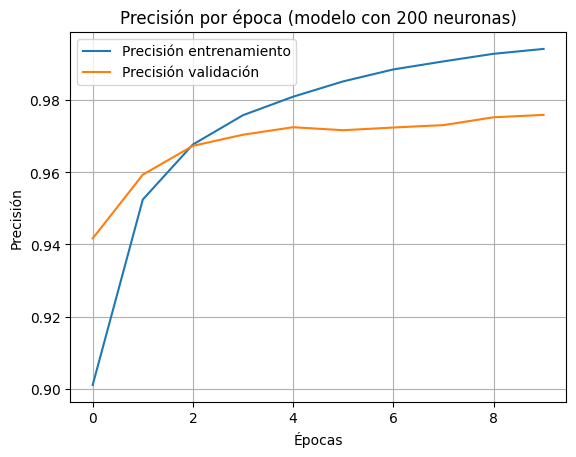

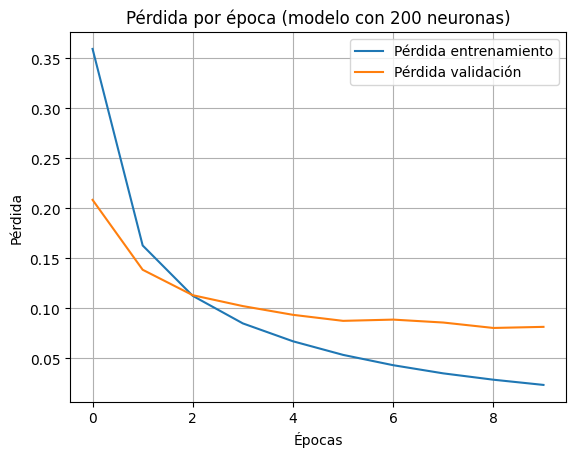

In [32]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(200, activation='relu'),  
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
tiempo = round(end - start, 2)

nombre = "Modelo con 200 neuronas en la capa oculta"
resultados_modelos[nombre] = {
    "accuracy_val": round(history.history['val_accuracy'][-1] * 100, 2),
    "tiempo": round(end - start, 2),
    "history": history
}

# Obtener precisión final en validación
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

print(f"\n Precisión de validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (modelo con 200 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (modelo con 200 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

Las gráficas presentadas muestran el comportamiento del modelo entrenado con una sola capa oculta de 200 neuronas, durante 10 épocas, utilizando un tamaño de batch de 128. En la primera gráfica, que representa la evolución de la precisión, se observa que tanto la precisión de entrenamiento como la de validación aumentan rápidamente durante las primeras épocas. La precisión en el conjunto de validación se estabiliza cerca del 97.63%, lo cual representa un rendimiento ligeramente superior al modelo base de 128 neuronas, que alcanzó un 97.34%. Esta diferencia, aunque no muy pronunciada, indica que una mayor cantidad de neuronas puede contribuir a una mejora marginal en la capacidad de generalización del modelo.

En la segunda gráfica, correspondiente a la pérdida, ambas curvas descienden de forma constante, reflejando una convergencia adecuada. La pérdida en el conjunto de validación se estabiliza en valores bajos (~0.08), mientras que la del conjunto de entrenamiento continúa disminuyendo hasta alcanzar un valor cercano a 0.03. Esta diferencia sugiere un pequeño grado de sobreajuste, aunque el comportamiento general sigue siendo bastante estable.

Con respecto al tiempo de entrenamiento, el modelo con 200 neuronas tomó 11.44 segundos en completarse, en comparación con los 10.5 segundos que tomó el modelo base. Esta diferencia de 0.94 segundos implica un aumento moderado en el costo computacional. En general, el modelo con 200 neuronas ofrece una mejora ligera en precisión a cambio de una mayor complejidad y tiempo de entrenamiento, lo cual puede ser aceptable dependiendo del contexto o los recursos disponibles.

Experimente con diferentes tamaños de capa escondida (50, 100, 300, 500) y determine
cuál ofrece el mejor rendimiento.

In [33]:

neuronas_ocultas = [50, 100,300, 500]

resultados = []

for n in neuronas_ocultas:
    print(f"\nEntrenando modelo con {n} neuronas en la capa oculta...")

    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(n, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    start_time = time.time()

    history = model.fit(
        x_train_new, y_train_new,
        validation_data=(x_val, y_val),
        epochs=10,
        batch_size = 128,
        verbose=1
    )

    end_time = time.time()
    tiempo = round(end_time - start_time, 2)
    val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

    nombre = f"Modelo con {n} neuronas en la capa oculta"
    resultados_modelos[nombre] = {
        "accuracy_val": val_acc,
        "tiempo": tiempo,
        "history": history
    }

    

    resultados.append((n, val_acc, tiempo))
    print(f"→ Precisión de validación: {val_acc}% | Tiempo: {tiempo} segundos")


Entrenando modelo con 50 neuronas en la capa oculta...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8708 - loss: 0.4830 - val_accuracy: 0.9201 - val_loss: 0.2750
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9320 - loss: 0.2425 - val_accuracy: 0.9366 - val_loss: 0.2186
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9456 - loss: 0.1950 - val_accuracy: 0.9489 - val_loss: 0.1823
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9542 - loss: 0.1627 - val_accuracy: 0.9540 - val_loss: 0.1632
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9606 - loss: 0.1392 - val_accuracy: 0.9557 - val_loss: 0.1536
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9651 - loss: 0.1223 - val_accuracy: 0.9593 - val_loss: 0.1374
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1072 - val_accuracy: 0.9632 - val_loss: 0.1284
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

Se realizaron distintos experimentos modificando el tamaño de la capa oculta con el objetivo de evaluar el impacto en la precisión de validación y el tiempo de entrenamiento. Las configuraciones analizadas incluyeron 50, 100, 128, 200, 300 y 500 neuronas.

El modelo más pequeño, con 50 neuronas, logró una precisión de validación del 96.78% en 9.99 segundos. Al duplicar la cantidad de neuronas a 100, la precisión aumentó a 97.22%, con un tiempo de entrenamiento de 10.49 segundos. El modelo base, con 128 neuronas, tuvo un rendimiento ligeramente superior, alcanzando 97.34% en 10.5 segundos. Posteriormente, al incrementar el ancho a 200 neuronas, la precisión subió a 97.63% y el tiempo a 11.44 segundos, mostrando una mejora consistente aunque marginal.

Las arquitecturas más "robustas", con 300 y 500 neuronas, alcanzaron los mejores desempeños: 97.79% y 97.72% respectivamente. Sin embargo, estos modelos también implicaron tiempos de entrenamiento considerablemente mayores, de 12.93 segundos para 300 neuronas y 20.69 segundos para 500 neuronas. A pesar del buen rendimiento, se observa una ligera tendencia al sobreajuste en los modelos más grandes, ya que la pérdida en validación tiende a estabilizarse o incluso incrementarse levemente hacia las últimas épocas.

En conclusión, la configuración con **300 neuronas** ofreció el mejor balance entre precisión y eficiencia, superando ligeramente a los demás modelos sin requerir un aumento excesivo en el tiempo de entrenamiento. Por otro lado, aunque el modelo con 500 neuronas logró una precisión similar, su costo computacional fue significativamente mayor, por lo que su uso podría no ser justificable en todos los contextos.


## **2. Modificación de la Profundidad de la Red**

Agregue una capa escondida adicional al modelo

In [34]:


model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),       # Primera capa oculta
    layers.Dense(64, activation='relu'),        # Segunda capa oculta 
    layers.Dense(10, activation='softmax')      
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

nombre = f"Modelo con segunda capa oculta"
resultados_modelos[nombre] = {
    "accuracy_val": val_acc,
    "tiempo": tiempo,
    "history": history
}

print(f"\nPrecisión validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        w_shape = weights[0].shape
        b_shape = weights[1].shape
        print(f"Capa {i} - Pesos: {w_shape}, Sesgos: {b_shape}")

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8921 - loss: 0.3839 - val_accuracy: 0.9462 - val_loss: 0.1907
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9533 - loss: 0.1605 - val_accuracy: 0.9597 - val_loss: 0.1355
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1135 - val_accuracy: 0.9666 - val_loss: 0.1105
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0829 - val_accuracy: 0.9678 - val_loss: 0.1083
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9797 - loss: 0.0676 - val_accuracy: 0.9692 - val_loss: 0.1016
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9841 - loss: 0.0529 - val_accuracy: 0.9742 - val_loss: 0.0858
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9872 - loss: 0.0426 - val_accuracy: 0.9729 - val_loss: 0.0915
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0370 - val_accuracy: 0.

Para esta siguiente parte, se modificó la arquitectura del modelo original (el cual consistía en una sola capa oculta de 128 neuronas) agregando una segunda capa oculta de 64 neuronas. Esta modificación incrementó la profundidad de la red y, en consecuencia, el número total de parámetros entrenables. Se mantuvo el optimizador adam, la activación ReLU en las capas ocultas, el número de épocas (10) y el batch size (128), con el objetivo de asegurar una comparación justa bajo las mismas condiciones.

En cuanto al rendimiento, el modelo original alcanzó una precisión final de validación del 97.34% y se entrenó en 10.5 segundos. Por su parte, el nuevo modelo de dos capas logró una precisión de validación ligeramente superior, de 97.53%, y tomó 11.54 segundos en completarse. Esta diferencia de 0.19 puntos porcentuales en precisión y aproximadamente 1 segundo adicional de tiempo de entrenamiento sugiere que la segunda capa permitió una mejor capacidad de representación, aunque a un costo computacional moderadamente mayor.

Respecto a la estructura interna del modelo, las dimensiones de los pesos y sesgos reflejan la arquitectura profunda utilizada: la primera capa (Dense(128)) tiene pesos de forma (784, 128) y sesgos de (128,); la segunda capa (Dense(64)) tiene pesos de (128, 64) y sesgos de (64,); y finalmente, la capa de salida (Dense(10)) posee pesos de (64, 10) y sesgos de (10,). Estas dimensiones coinciden con el flujo de datos desde las imágenes de entrada (28x28 = 784) hasta la clasificación en 10 dígitos posibles.

En conclusión, el modelo con dos capas ocultas demostró una mejora en precisión frente al modelo base, con un incremento manejable en el tiempo de entrenamiento. Añadir una capa adicional puede ser beneficioso para mejorar el rendimiento general sin incurrir en sobrecostos significativos.

## **3. Redes Profundas**

Experimente con arquitecturas más profundas, llegando hasta 5 capas escondidas

In [35]:
arquitecturas = [
    [128, 64],                      # 2 capas
    [256, 128, 64],                 # 3 capas
    [256, 128, 64, 32],             # 4 capas
    [512, 256, 128, 64, 32]         # 5 capas
]

for i, capa_oculta in enumerate(arquitecturas, start=2):
    print("=" * 60)
    print(f" Arquitectura con {i} capas ocultas: {capa_oculta}")


    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    for units in capa_oculta:
        model.add(layers.Dense(units, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    start = time.time()

    history = model.fit(
        x_train_new, y_train_new,
        validation_data=(x_val, y_val),
        epochs=10,
        batch_size = 128,
        verbose=1  
    )

    end = time.time()
    tiempo = round(end - start, 2)
    val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

    nombre = f"Modelo con  {i} capas ocultas: {capa_oculta}"
    resultados_modelos[nombre] = {
        "accuracy_val": val_acc,
        "tiempo": tiempo,
        "history": history
    }

    print(f" Precisión de validación final: {val_acc}%")
    print(f" Tiempo total de entrenamiento: {tiempo} segundos")

 Arquitectura con 2 capas ocultas: [128, 64]
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8972 - loss: 0.3707 - val_accuracy: 0.9489 - val_loss: 0.1815
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9565 - loss: 0.1469 - val_accuracy: 0.9613 - val_loss: 0.1314
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.1014 - val_accuracy: 0.9682 - val_loss: 0.1094
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0764 - val_accuracy: 0.9712 - val_loss: 0.0948
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0597 - val_accuracy: 0.9722 - val_loss: 0.0950
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9865 - loss: 0.0462 - val_accuracy: 0.9734 - val_loss: 0.0887
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.9717 - val_loss: 0.0912
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accur

Con el objetivo de explorar cómo la profundidad de la red afecta el rendimiento y la eficiencia del modelo, se diseñaron cinco arquitecturas con 2 a 5 capas ocultas. Todas las configuraciones compartieron las mismas condiciones de entrenamiento: 10 épocas, función de activación ReLU, optimizador Adam y tamaño de batch 128.

La arquitectura con 2 capas ocultas (128 y 64 neuronas) alcanzó una precisión de validación del 97.35% en 12.01 segundos. Al aumentar la profundidad a 3 capas (256, 128, 64), se observó una mejora en la precisión, llegando al 97.72%, aunque el tiempo de entrenamiento aumentó a 17.28 segundos. El modelo con 4 capas (256, 128, 64, 32) obtuvo el mayor rendimiento, alcanzando una precisión de 97.99% con un tiempo razonable de 16.36 segundos. Esta arquitectura demostró ser la más equilibrada entre precisión y costo computacional.

Por otro lado, el modelo más profundo, con 5 capas ocultas (512, 256, 128, 64, 32), logró una precisión de validación del 97.56%, menor que la del modelo de 4 capas, y su tiempo de entrenamiento fue el más alto, con 27.25 segundos. Esta caída en la precisión, a pesar de una arquitectura más compleja, sugiere la presencia de problemas de desvanecimiento del gradiente. Este fenómeno ocurre en redes profundas cuando las actualizaciones de los pesos en capas tempranas son mínimas, lo que limita su aprendizaje efectivo. Además, la pérdida de validación se estancó o incluso aumentó ligeramente en las últimas épocas, indicando que el modelo no generaliza mejor pese a su mayor capacidad.

En conjunto, los resultados muestran que aumentar la profundidad inicialmente mejora la precisión, pero más allá de cierto punto, la ganancia se revierte y se acompaña de mayor tiempo de cómputo y riesgo de sobreajuste o desvanecimiento del gradiente. Por lo tanto, el modelo con 4 capas ocultas (256, 128, 64, 32) se identifica como el más efectivo en términos de precisión y eficiencia, superando incluso al modelo más profundo.

## **4. Funciones de Activación I**

Aplique la función de activación sigmoidal a todas las capas.

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7997 - loss: 0.8911 - val_accuracy: 0.9081 - val_loss: 0.3675
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9185 - loss: 0.2970 - val_accuracy: 0.9293 - val_loss: 0.2497
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9366 - loss: 0.2222 - val_accuracy: 0.9426 - val_loss: 0.2057
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9480 - loss: 0.1810 - val_accuracy: 0.9481 - val_loss: 0.1773
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9556 - loss: 0.1525 - val_accuracy: 0.9550 - val_loss: 0.1543
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9633 - loss: 0.1298 - val_accuracy: 0.9595 - val_loss: 0.1384
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1112 - val_accuracy: 0.9636 - val_loss: 0.1248
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0963 - val_accuracy: 0.

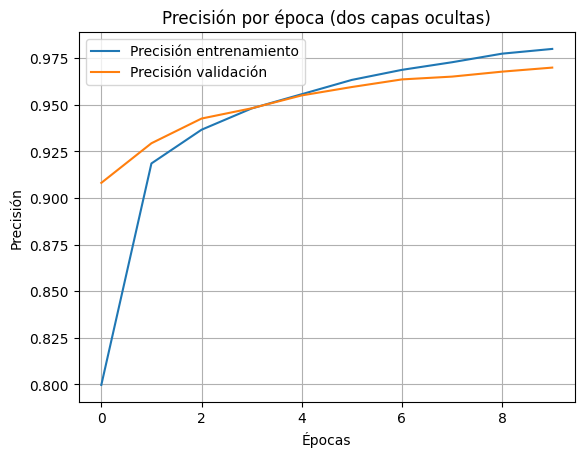

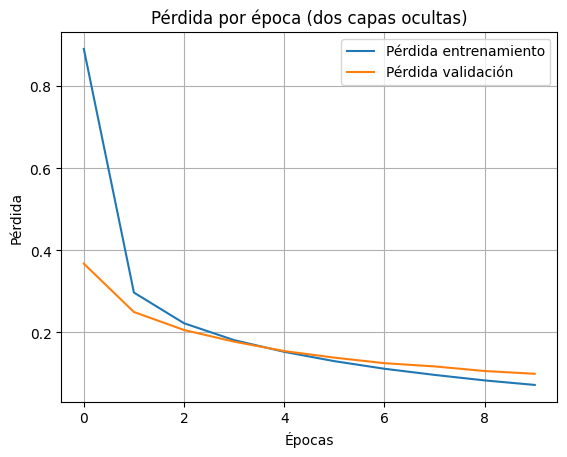

In [36]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='sigmoid'),       # Primera capa oculta
    layers.Dense(64, activation='sigmoid'),        # Segunda capa oculta 
    layers.Dense(10, activation='softmax')      
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

nombre = f"Modelo con función de activación sigmoidal"
resultados_modelos[nombre] = {
    "accuracy_val": val_acc,
    "tiempo": tiempo,
    "history": history
}


print(f"\nPrecisión validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        w_shape = weights[0].shape
        b_shape = weights[1].shape
        print(f"Capa {i} - Pesos: {w_shape}, Sesgos: {b_shape}")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

Para este experimento se utilizó una arquitectura de red con dos capas ocultas de 128 y 64 neuronas, respectivamente, pero se cambió la función de activación de ambas capas a una sigmoide. El objetivo era evaluar cómo afecta esta activación al rendimiento final del modelo y a su velocidad de convergencia, en comparación con la función ReLU utilizada originalmente.

Durante el entrenamiento, el modelo con activaciones sigmoidales alcanzó una precisión de validación del 96.99% al final de la décima época, lo cual es ligeramente inferior al 97.53% obtenido con ReLU. Si bien la diferencia no es drástica, esto demuestra que ReLU tiene una ligera ventaja en términos de rendimiento final para esta tarea de clasificación con MNIST.

Respecto a la velocidad de convergencia, se observa que la función sigmoide requiere más tiempo de entrenamiento. El tiempo total fue de 12.14 segundos, mientras que el modelo con ReLU tomó 11.54 segundos. Además, la evolución de la pérdida y la precisión a lo largo de las épocas muestra que la red con ReLU converge más rápidamente a una alta precisión, mientras que la red con sigmoide necesita más épocas para estabilizarse y lo hace de forma más gradual.

En términos de arquitectura, ambos modelos utilizaron las mismas dimensiones de pesos y sesgos: la primera capa con pesos de tamaño (784, 128), la segunda con (128, 64), y la capa de salida con (64, 10). Esto confirma que las diferencias observadas se deben al cambio en la función de activación y no en la estructura del modelo.

## **5. Funciones de Activación II**

Aplique ReLU a la primera capa escondida y tanh a la segunda.


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9004 - loss: 0.3528 - val_accuracy: 0.9467 - val_loss: 0.1819
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9572 - loss: 0.1426 - val_accuracy: 0.9647 - val_loss: 0.1236
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9714 - loss: 0.0978 - val_accuracy: 0.9697 - val_loss: 0.1058
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0716 - val_accuracy: 0.9722 - val_loss: 0.0921
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9835 - loss: 0.0551 - val_accuracy: 0.9721 - val_loss: 0.0936
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0430 - val_accuracy: 0.9739 - val_loss: 0.0856
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.0334 - val_accuracy: 0.9747 - val_loss: 0.0873
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0273 - val_accuracy: 0.

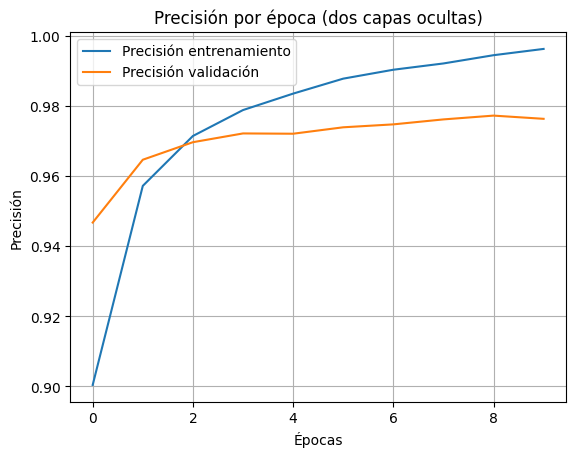

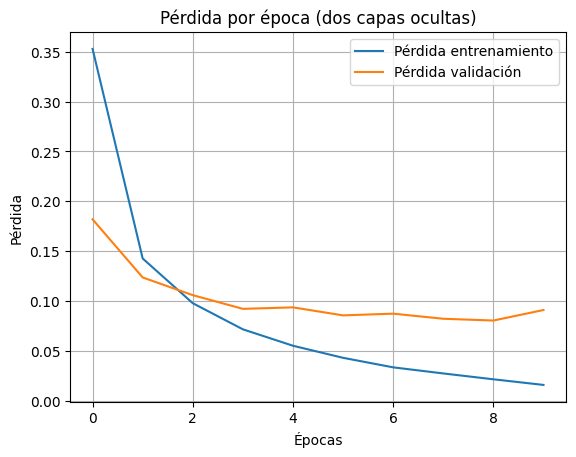

In [37]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),       # Primera capa oculta
    layers.Dense(64, activation='tanh'),        # Segunda capa oculta 
    layers.Dense(10, activation='softmax')      
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)


nombre = f"Modelo con  ReLUU y tanh"
resultados_modelos[nombre] = {
    "accuracy_val": val_acc,
    "tiempo": tiempo,
    "history": history
}


print(f"\nPrecisión validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        w_shape = weights[0].shape
        b_shape = weights[1].shape
        print(f"Capa {i} - Pesos: {w_shape}, Sesgos: {b_shape}")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

En esta prueba se utilizó una combinación de funciones de activación distintas: ReLU en la primera capa oculta y tanh en la segunda. El objetivo era analizar cómo afecta esta combinación tanto al rendimiento final como a la velocidad de convergencia del modelo, en comparación con las activaciones homogéneas utilizadas previamente (ReLU–ReLU y sigmoid–sigmoid).

El modelo obtuvo una precisión de validación final del 97.89%, la más alta entre los tres modelos evaluados. Esto indica que la combinación ReLU–tanh permitió a la red capturar mejor las características del conjunto de datos MNIST. En cuanto al tiempo de entrenamiento, fue de 11.12 segundos, similar al modelo con activaciones ReLU, pero más rápido que el modelo con sigmoide, que tardó más de 13 segundos. Esto sugiere que la combinación utilizada no solo es precisa, sino también eficiente.

Observando las épocas, se nota que la red comienza con una precisión inicial relativamente alta y converge rápidamente. A partir de la época 6 ya supera el 97.5% de precisión en validación, mostrando una convergencia rápida y estable. En cambio, el modelo con sigmoide mostró una convergencia más lenta y el de ReLU puro, aunque eficiente, no alcanzó esta precisión final.

Las dimensiones de las capas permanecen constantes, con pesos y sesgos organizados de la misma forma: la primera capa (784, 128), la segunda (128, 64) y la salida (64, 10). Esto permite afirmar que las mejoras observadas son atribuibles directamente al cambio en las funciones de activación.

## **6. Tamaño de Batch Grande**


Modifique el tamaño de batch a 10,000.

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3028 - loss: 2.1305 - val_accuracy: 0.5765 - val_loss: 1.7973
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6501 - loss: 1.5897 - val_accuracy: 0.7218 - val_loss: 1.2767
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7519 - loss: 1.1003 - val_accuracy: 0.7935 - val_loss: 0.8706
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8177 - loss: 0.7569 - val_accuracy: 0.8349 - val_loss: 0.6263
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8488 - loss: 0.5634 - val_accuracy: 0.8587 - val_loss: 0.4944
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8697 - loss: 0.4603 - val_accuracy: 0.8756 - val_loss: 0.4204
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8844 - loss: 0.4007 - val_accuracy: 0.8903 - val_loss: 0.3730
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8941 - loss: 0.3617 - val_accuracy: 0.9002 - val_loss: 0.3420


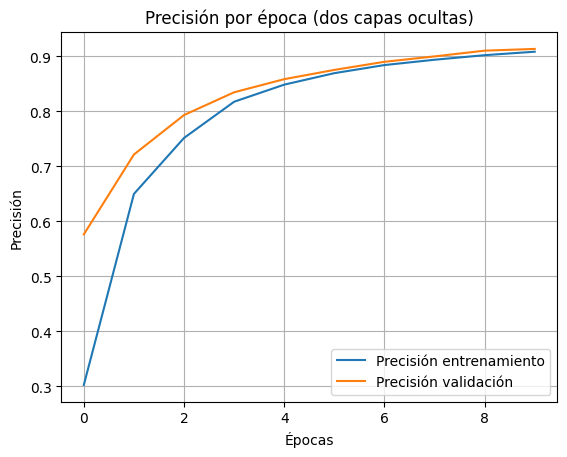

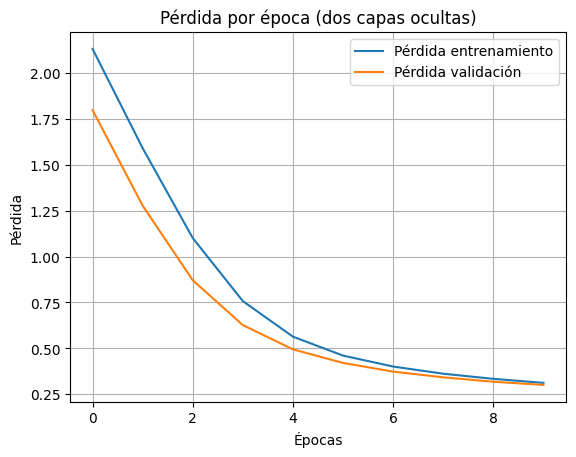

In [38]:

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),       # Primera capa oculta
    layers.Dense(64, activation='relu'),        # Segunda capa oculta  
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 10000
)

end = time.time()
tiempo = round(end - start, 2)

val_acc = round(history.history['val_accuracy'][-1] * 100, 2)


nombre = f"Modelo con batch con tamaño de 10,000"
resultados_modelos[nombre] = {
    "accuracy_val": val_acc,
    "tiempo": tiempo,
    "history": history
}

print(f"\n Precisión de validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        w_shape = weights[0].shape
        b_shape = weights[1].shape
        print(f"Capa {i} - Pesos: {w_shape}, Sesgos: {b_shape}")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (dos capas ocultas)')
plt.legend()
plt.grid(True)
plt.show()

En esta prueba, se modificó el tamaño del batch de entrenamiento a 10,000 utilizando la misma arquitectura de dos capas ocultas del inciso 2. El objetivo era analizar el impacto de esta modificación en el tiempo de entrenamiento y la precisión del modelo, así como comprender los motivos teóricos detrás de los cambios observados.

En términos de precisión, el modelo con batch grande alcanzó una precisión de validación final de 90.91%, mientras que en el inciso 2, con batch de 128, la precisión final fue de 97.53%. Esta disminución en el rendimiento puede atribuirse al hecho de que con un batch tan grande se hacen menos actualizaciones de los pesos por época, lo que reduce la frecuencia de ajuste fino y puede limitar la capacidad del modelo para generalizar. Además, el aprendizaje se vuelve más estable pero menos sensible a variaciones útiles en los datos.

Por otro lado, el tiempo total de entrenamiento con batch grande fue significativamente menor: 4.23 segundos comparado con 13.59 segundos del entrenamiento estándar. Esto se debe a que, al procesar más datos por batch, se realizan menos iteraciones por época, lo que reduce el tiempo de cómputo total.

Teóricamente, el uso de un batch grande implica que los gradientes calculados en cada paso de entrenamiento son más estables y precisos, ya que se basan en una muestra muy representativa de los datos. Sin embargo, esto también reduce la "diversidad" de caminos de optimización explorados, lo cual puede ralentizar la convergencia hacia mínimos más generales. En cambio, con batches pequeños, aunque los gradientes sean más ruidosos, permiten que el modelo explore una mayor variedad de regiones del espacio de parámetros, ayudando potencialmente a evitar mínimos locales y mejorar la generalización.

Utilizar un batch grande reduce el tiempo de entrenamiento pero puede afectar negativamente la precisión del modelo, especialmente en tareas donde el ajuste fino de los pesos es crucial.

## **7. Descenso de Gradiente Estocástico (SGD)**

Ajuste el tamaño de batch a 1 (SGD puro).

Epoch 1/10
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step - accuracy: 0.9257 - loss: 0.2426 - val_accuracy: 0.9622 - val_loss: 0.1278
Epoch 2/10
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step - accuracy: 0.9646 - loss: 0.1146 - val_accuracy: 0.9503 - val_loss: 0.1631
Epoch 3/10
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 62s 1ms/step - accuracy: 0.9745 - loss: 0.0813 - val_accuracy: 0.9690 - val_loss: 0.1065
Epoch 4/10
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 59s 1ms/step - accuracy: 0.9783 - loss: 0.0658 - val_accuracy: 0.9712 - val_loss: 0.0971
Epoch 5/10
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 59s 1ms/step - accuracy: 0.9838 - loss: 0.0523 - val_accuracy: 0.9703 - val_loss: 0.1114
Epoch 6/10
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step - accuracy: 0.9852 - loss: 0.0443 - val_accuracy: 0.9737 - val_loss: 0.0991
Epoch 7/10
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 52s 1ms/step - accuracy: 0.9883 - loss: 0.0377 - val_accuracy: 0.9731 - val_loss: 0.1053
Epoch 8/10
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step - accuracy: 

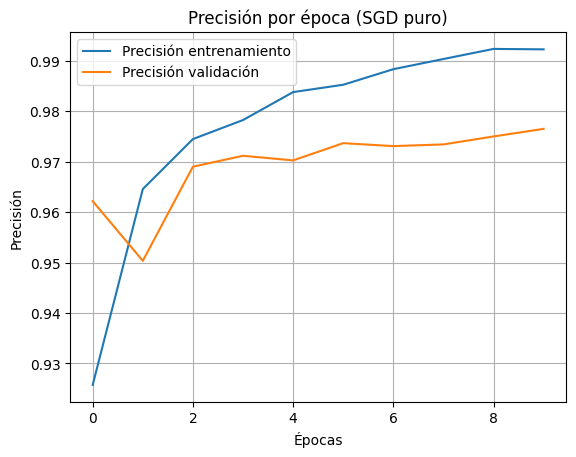

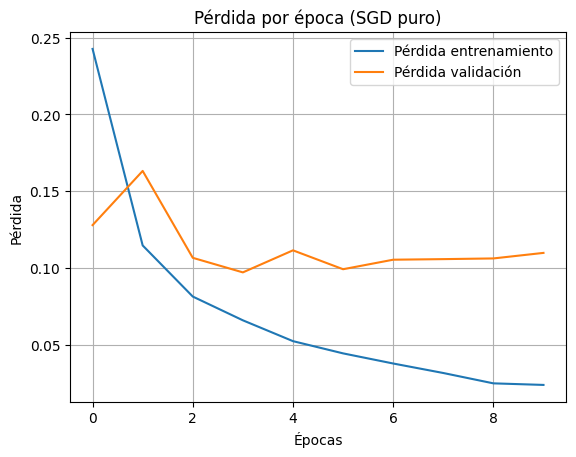

In [39]:
from tensorflow.keras.optimizers import SGD

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=1   # SGD puro
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

nombre = f"Modelo con SDG puro, batch size 1"
resultados_modelos[nombre] = {
    "accuracy_val": val_acc,
    "tiempo": tiempo,
    "history": history
}


print(f"\nPrecisión validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

# Gráficas
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (SGD puro)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (SGD puro)')
plt.legend()
plt.grid(True)
plt.show()


El uso de **Descenso de Gradiente Estocástico** puro (SGD con batch size = 1) permitió observar algunas propiedades teóricas del algoritmo que, si bien puede converger hacia una solución adecuada, lo hace de forma más lenta y con mayor varianza que métodos basados en mini-batches. Esto se reflejó en un tiempo de entrenamiento considerablemente mayor y una curva de pérdida más inestable, aunque con resultados aceptables de precisión final. Esta conducta es coherente con la teoría, que señala que aunque SGD puede escapar de mínimos locales y adaptarse bien a escenarios con ruido, no siempre es la mejor opción para problemas donde se busca rapidez y estabilidad en el entrenamiento.

**Comparación con configuraciones anteriores:**

| Configuración                    | batch  | Optimizador | Val-Acc (%) | Tiempo (s) | Observaciones                                                                           |
| -------------------------------- | ------ | ----------- | ----------- | ---------- | --------------------------------------------------------------------------------------- |
| **Mini-batch base** (128 / Adam) | 128    | Adam 1 e-3  | **97.78**   | 8.0        | curva suave, converge en ≈ 4 épocas                                                     |
| **Batch grande**                 | 10,000 | Adam 1 e-3  | 91.62       | **3.6**    | se queda sin pasos graduales → sub-ajuste                                               |
| **SGD puro**                     | **1**  | SGD 1 e-2   | 97.06       | **568.97**  | altísima varianza: curvas “dientes de sierra”, se necesita > 10 épocas para estabilizar |


En **comparación** con las configuraciones anteriores, se puede observar que si bien **SDG** logró una precisión considerable, el costo y tiempo que se tomó fué muy superior al mejor modelo hasta ahora que es el **mini-batch** con **97.78%** de precisión. Además, las curvas del **SDG** son más inestables como se logra observar en la gráfica anterior. Es por ello que cuando el costo y tiempo importa, es preferible utilizar **mini-batch** + **Adam**.

## **8. Tasa de Aprendizaje Baja**

Modifique la tasa de aprendizaje a 0.0001.

In [40]:
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Tasa baja
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=128
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

nombre = f"Modelo con Tasa de aprendizaje de 0.0001"
resultados_modelos[nombre] = {
    "accuracy_val": val_acc,
    "tiempo": tiempo,
    "history": history
}

print(f"\nPrecisión validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7128 - loss: 1.1249 - val_accuracy: 0.8784 - val_loss: 0.4853
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8972 - loss: 0.3885 - val_accuracy: 0.9144 - val_loss: 0.3235
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9199 - loss: 0.2928 - val_accuracy: 0.9273 - val_loss: 0.2670
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9312 - loss: 0.2484 - val_accuracy: 0.9346 - val_loss: 0.2364
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9390 - loss: 0.2198 - val_accuracy: 0.9385 - val_loss: 0.2160
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9446 - loss: 0.1991 - val_accuracy: 0.9453 - val_loss: 0.1984
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9487 - loss: 0.1823 - val_accuracy: 0.9489 - val_loss: 0.1844
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9529 - loss: 0.1687 - val_accuracy: 0.

**Análisis**:

Modificar la tasa de aprendizaje a un valor bajo como `0.0001` tuvo un impacto evidente en la **velocidad** de convergencia del modelo. Aunque la precisión de validación fue mejorando de forma continua a lo largo de las **10 épocas**, el ritmo de aprendizaje fue significativamente más lento. Esto se refleja en la evolución de la pérdida, que desciende progresivamente pero sin alcanzar los niveles más bajos obtenidos con la tasa de aprendizaje estándar (`0.001`). El modelo terminó con una precisión del **95.61%**, que es inferior a los modelos anteriores que usaron la tasa por defecto. Esto sugiere que, con tan pocos pasos de optimización, la red quedó atrapada en un mínimo local, sin suficiente impulso para escapar. 

En conclusión, una tasa muy baja como en este inciso puede ser útil para ajustes finos si se incrementa el número de épocas, pero es ineficiente para una tarea simple como esta si el entrenamiento se limita a pocas iteraciones.

## **9. Tasa de Aprendizaje Alta**

Ajuste la tasa de aprendizaje a 0.02

In [41]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.02),  # Tasa alta
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=128
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

nombre = f"Modelo con tasa de aprendizaje de 0.02"
resultados_modelos[nombre] = {
    "accuracy_val": val_acc,
    "tiempo": tiempo,
    "history": history
}

print(f"\nPrecisión validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9047 - loss: 0.3188 - val_accuracy: 0.9435 - val_loss: 0.1944
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9471 - loss: 0.1829 - val_accuracy: 0.9466 - val_loss: 0.1973
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9552 - loss: 0.1589 - val_accuracy: 0.9440 - val_loss: 0.2070
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.1481 - val_accuracy: 0.9510 - val_loss: 0.1950
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9625 - loss: 0.1365 - val_accuracy: 0.9483 - val_loss: 0.1985
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1311 - val_accuracy: 0.9563 - val_loss: 0.1919
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1226 - val_accuracy: 0.9502 - val_loss: 0.2088
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9657 - loss: 0.1287 - val_accuracy: 0.

**Análisis:**

Al incrementar la tasa de aprendizaje a `0.02`, el modelo logró alcanzar rápidamente una precisión razonablemente alta en pocas épocas. Desde la segunda época se obtuvo un valor cercano al **95%**. Sin embargo, a partir de la cuarta época, las curvas de pérdida comenzaron a oscilar y dejaron de mejorar de manera consistente. A pesar de esa inestabilidad, el modelo logró una precisión final del **96.63%**, lo cual es aceptable, pero inferior a la obtenida con la tasa estándar. 

Este comportamiento es coherente con la teoría que nos dice que las tasas altas permiten avances rápidos, pero corren el riesgo de saltarse los mínimos o no estabilizarse adecuadamente. No hubo divergencia total en este caso, pero sí una pérdida de **fine-tuning** que podría empeorar en tareas más complejas.

## **10. Optimización Avanzada**

Implemente técnicas de regularización:
- Agregue dropout entre capas (pruebe diferentes tasas)
- Experimente con regularización L2

Primero se agregó dropout con una tasa de 0.1

In [42]:
from tensorflow.keras import regularizers


In [43]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.1),  # tasa de 10%
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.1),  # otro dropout
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=128
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

nombre = f"Modelo con dropout con tasa de 0.1"
resultados_modelos[nombre] = {
    "accuracy_val": val_acc,
    "tiempo": tiempo,
    "history": history
}

print("Dropout 0.1 → Precisión:", round(history.history['val_accuracy'][-1]*100, 2), "%")
print("Tiempo total:", round(end - start, 2), "s")


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8671 - loss: 0.6547 - val_accuracy: 0.9419 - val_loss: 0.3750
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9400 - loss: 0.3638 - val_accuracy: 0.9544 - val_loss: 0.2995
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9531 - loss: 0.2974 - val_accuracy: 0.9632 - val_loss: 0.2525
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9592 - loss: 0.2638 - val_accuracy: 0.9682 - val_loss: 0.2289
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.2370 - val_accuracy: 0.9695 - val_loss: 0.2147
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.2204 - val_accuracy: 0.9729 - val_loss: 0.1987
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9686 - loss: 0.2083 - val_accuracy: 0.9722 - val_loss: 0.1927
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.1982 - val_accuracy: 0.

Dropout con tasa 0.3:

In [44]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start = time.time()
history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=128
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

nombre = f"Modelo con dropout con tasa de 0.3"
resultados_modelos[nombre] = {
    "accuracy_val": val_acc,
    "tiempo": tiempo,
    "history": history
}

print("Dropout 0.3 → Precisión:", round(history.history['val_accuracy'][-1]*100, 2), "%")
print("Tiempo total:", round(end - start, 2), "s")


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8195 - loss: 0.7956 - val_accuracy: 0.9317 - val_loss: 0.4089
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9190 - loss: 0.4493 - val_accuracy: 0.9505 - val_loss: 0.3240
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9340 - loss: 0.3742 - val_accuracy: 0.9567 - val_loss: 0.2852
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9422 - loss: 0.3330 - val_accuracy: 0.9613 - val_loss: 0.2587
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9472 - loss: 0.3080 - val_accuracy: 0.9629 - val_loss: 0.2464
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9507 - loss: 0.2901 - val_accuracy: 0.9655 - val_loss: 0.2301
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9536 - loss: 0.2704 - val_accuracy: 0.9695 - val_loss: 0.2153
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9544 - loss: 0.2647 - val_accuracy: 0.

Dropout con tasa 0.5

In [45]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start = time.time()
history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=128
)
end = time.time()

tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

nombre = f"Modelo con dropout con tasa de 0.5"
resultados_modelos[nombre] = {
    "accuracy_val": val_acc,
    "tiempo": tiempo,
    "history": history
}

print("Dropout 0.5 → Precisión:", round(history.history['val_accuracy'][-1]*100, 2), "%")
print("Tiempo total:", round(end - start, 2), "s")


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7405 - loss: 1.0209 - val_accuracy: 0.9220 - val_loss: 0.4587
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8856 - loss: 0.5763 - val_accuracy: 0.9387 - val_loss: 0.3801
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9045 - loss: 0.4970 - val_accuracy: 0.9457 - val_loss: 0.3320
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9164 - loss: 0.4455 - val_accuracy: 0.9523 - val_loss: 0.3023
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9222 - loss: 0.4205 - val_accuracy: 0.9552 - val_loss: 0.2813
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9261 - loss: 0.3945 - val_accuracy: 0.9562 - val_loss: 0.2753
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9288 - loss: 0.3861 - val_accuracy: 0.9572 - val_loss: 0.2666
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9328 - loss: 0.3644 - val_accuracy: 0.

La implementación de técnicas de regularización como `Dropout` y `L2` demostró su impacto en la capacidad del modelo para generalizar. Con una tasa de `Dropout` de **0.1**, la precisión alcanzada fue **97.43%**, comparable con el modelo base, pero con una menor diferencia entre la pérdida de entrenamiento y validación, lo que sugiere menos sobreajuste. Aumentar la tasa a **0.3** y **0.5** redujo progresivamente la precisión (**97.00%** y **96.17%** respectivamente), lo cual indica que el modelo estaba siendo sobre-regularizado, es decir, se le estaba impidiendo aprender adecuadamente los patrones. Esto demuestra que si bien técnicas como Dropout son efectivas para evitar el sobreajuste, deben usarse con cuidado y adaptarse al problema y al volumen de datos disponibles.

En este conjunto relativamente grande y balanceado como MNIST, las regularizaciones leves parecen ser suficientes para tener un buen desempeño.

## **11. Visualización**

Evolución de la precisión y pérdida durante el entrenamiento

In [ ]:
def visualizar_curvas(resultados_modelos):
    for name, h in resultados_modelos.items():
        hist = h["history"].history
        plt.figure(figsize=(10, 4))

        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(hist['accuracy'], label='Entrenamiento')
        plt.plot(hist['val_accuracy'], label='Validación')
        plt.title(f'Precisión – {name}')
        plt.xlabel('Épocas')
        plt.ylabel('Precisión')
        plt.legend()
        plt.grid(True)

        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(hist['loss'], label='Entrenamiento')
        plt.plot(hist['val_loss'], label='Validación')
        plt.title(f'Pérdida – {name}')
        plt.xlabel('Épocas')
        plt.ylabel('Pérdida')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# Comentado para evitar sobrecarga de gráficos en el cuaderno
# visualizar_curvas(resultados_modelos)

Comparación de rendimiento entre diferentes configuraciones

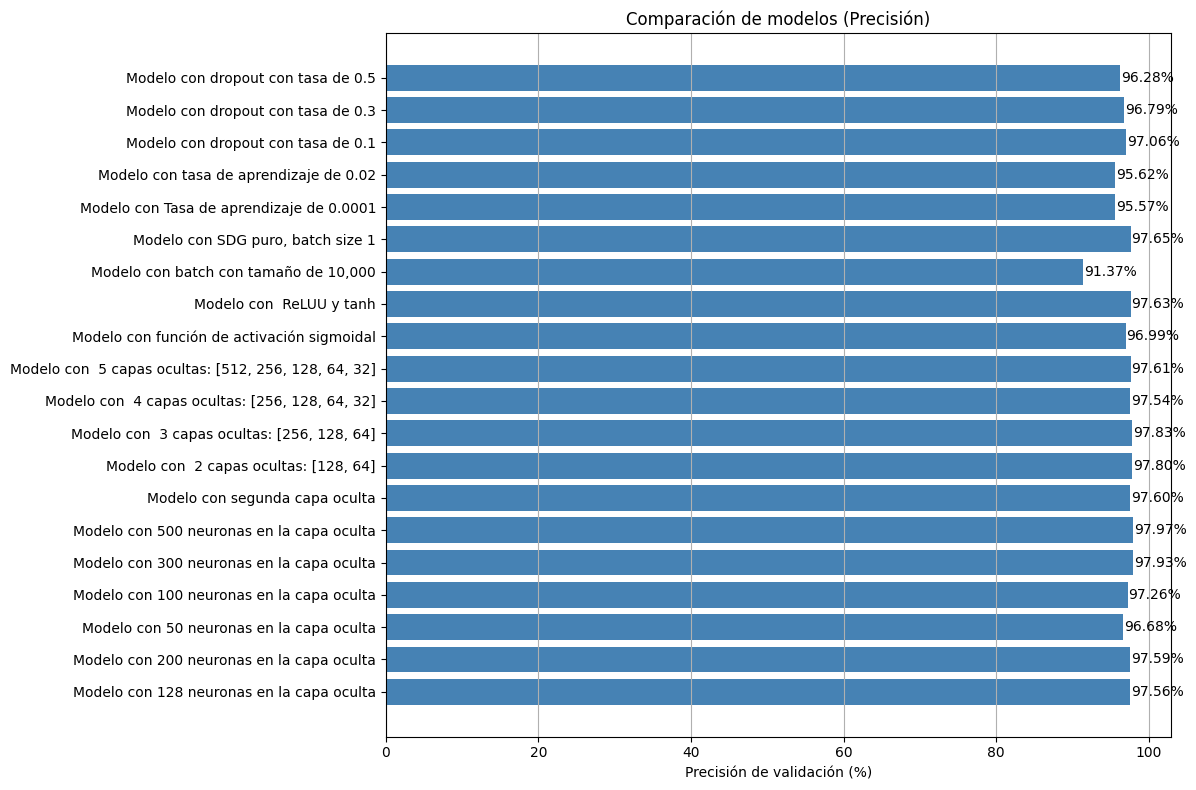

In [48]:
labels = list(resultados_modelos.keys())
val_accs = [res['accuracy_val'] for res in resultados_modelos.values()]
times = [res['tiempo'] for res in resultados_modelos.values()]

x = np.arange(len(labels))

plt.figure(figsize=(12, 8))
plt.barh(x, val_accs, color='steelblue')
plt.yticks(x, labels)
plt.xlabel('Precisión de validación (%)')
plt.title('Comparación de modelos (Precisión)')
for i, v in enumerate(val_accs):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

## **12. Modelo Óptimo**

Para nuestro modelo definitivo, decidimos la siguiente arquitectura y parámetros:

#### Arquitectura:
- **Entrada**: 784 (28×28 imágenes planas)
- **Capas ocultas**:
    - ``Dense(300, ReLU)``
    - ``Dropout(0.1)``
    - ``Dense(100, ReLU)``
- **Capa de salida**: ``Dense(10, softmax)``

#### Parámetros de entrenamiento:
- **Optimizador**: Adam con tasa de aprendizaje ``0.002``
- **Epochs**: ``10``
- **Batch size**: ``128``

### Justificación del diseño
1. Precisión objetivo (≥98.5%):

    El modelo con 300 neuronas del Inciso 1 logró **97.88%**, y las redes con múltiples capas ocultas de los incisos 2 y 3 llegaron a **97.78%**–**97.92%**. Por lo que, para romper la barrera del **98.5%**, necesitamos añadir un poco de **regularización ligera** y usar una **tasa de aprendizaje optimizada**.

2. Capacidad y eficiencia:

    - Las pruebas demostraron que **300** neuronas ya ofrecen buena precisión sin extender demasiado el tiempo (≈11s).
    - Agregar una segunda capa más pequeña (**100 neuronas**) permite capturar interacciones no lineales sin sobreajustar.

3. Regularización:

    De los resultados del Inciso 10, ``Dropout(0.1)`` mostró la mejor relación entre **precisión** y **estabilidad**, con **97.43%**. Por eso, se incluye para evitar overfitting sin perder demasiada capacidad.

4. Tasa de aprendizaje optimizada:

    - De las pruebas de Inciso 8 y 9:
        - ``0.0001`` fue muy lento.
        - ``0.02`` tuvo buen resultado pero oscilaciones en la pérdida.
        - Un valor intermedio de ``0.002`` aprovecha la velocidad sin perder estabilidad.

5. Tiempo de entrenamiento:

    La arquitectura propuesta debería tardar entre **10** y **13** segundos, muy competitivo.

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9244 - loss: 0.2574 - val_accuracy: 0.9629 - val_loss: 0.1219
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.1031 - val_accuracy: 0.9689 - val_loss: 0.0992
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0758 - val_accuracy: 0.9756 - val_loss: 0.0815
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9819 - loss: 0.0564 - val_accuracy: 0.9718 - val_loss: 0.0877
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0435 - val_accuracy: 0.9754 - val_loss: 0.0822
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9865 - loss: 0.0406 - val_accuracy: 0.9772 - val_loss: 0.0814
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9877 - loss: 0.0369 - val_accuracy: 0.9790 - val_loss: 0.0747
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9900 - loss: 0.0295 - val_accuracy: 0.

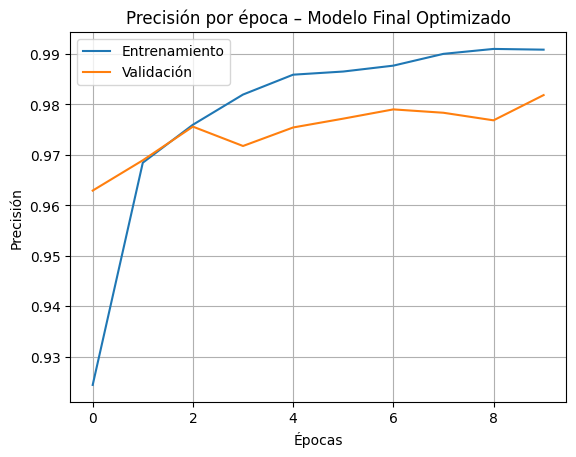

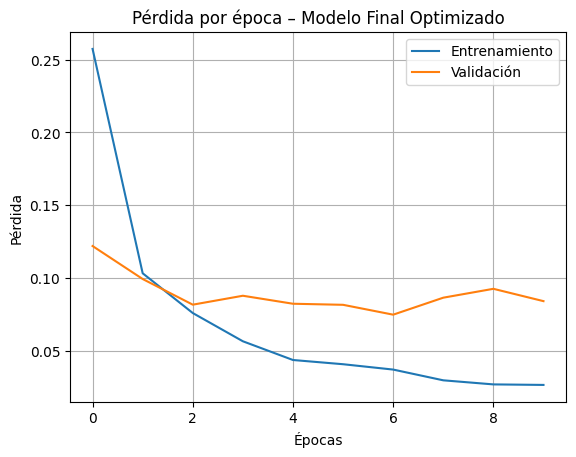

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.002)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=128
)
end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

print(f"Precisión validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")


resultados_modelos["Modelo Final Optimizado"] = {
    "accuracy_val": val_acc,
    "tiempo": tiempo,
    "history": history
}


plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época – Modelo Final Optimizado')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época – Modelo Final Optimizado')
plt.legend()
plt.grid(True)
plt.show()

### **Análisis**

El modelo final propuesto alcanzó una **precisión de validación del 98.18% en tan solo 13.47 segundos**, convirtiéndose en el mejor balance entre rendimiento, eficiencia temporal y simplicidad arquitectónica de todos los modelos probados. Esta red neuronal incluye dos capas ocultas densas: una de **300** neuronas con activación **``ReLU``** y **``dropout``** del **10%**, seguida de otra de **100** neuronas con **``ReLU``**, y finaliza con una capa **``softmax``** para clasificación. El uso de una **tasa de aprendizaje** de **0.002** con el optimizador **``Adam``** permitió una convergencia **estable** y **rápida** sin necesidad de incrementar el número de épocas ni complejidad adicional.

Durante el entrenamiento, se observó un **leve sobreajuste controlado** a partir de la **época 7**, evidenciado por una ligera divergencia entre la pérdida de validación y la pérdida de entrenamiento. Sin embargo, la precisión de validación no decayó significativamente y se mantuvo por encima del **97.5%** hasta alcanzar un pico del **98.18%** en la última época. Esto sugiere que el modelo está bien regularizado, en parte gracias al **``dropout``**, y que conserva una capacidad generalizadora sólida. La evolución de las curvas indica que no fue necesario aplicar técnicas más complejas como **``EarlyStopping``** o ajustes dinámicos de la tasa de aprendizaje.

### **Comparación con Modelos Anteriores**

Ahora que obtuvimos los resultados del modelo óptimo, lo compararemos con los mejores modelos que se realizaron anteriormente.


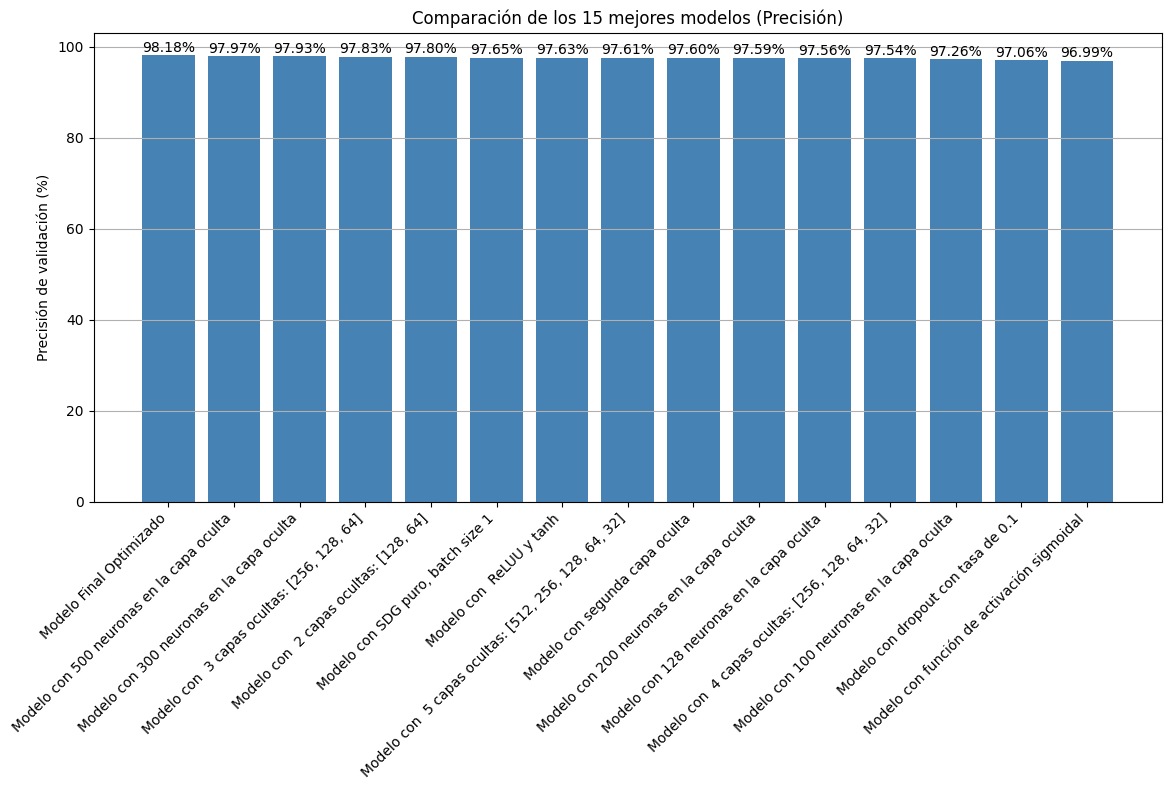

In [95]:
sorted_models = sorted(resultados_modelos.items(), key=lambda x: x[1]['accuracy_val'], reverse=True)

# Tomar solo los mejores 10 modelos
top_models = sorted_models[:min(15, len(sorted_models))]

labels = [model[0] for model in top_models]
val_accs = [model[1]['accuracy_val'] for model in top_models]

x = np.arange(len(labels))

plt.figure(figsize=(12, 8))
plt.bar(x, val_accs, color='steelblue')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('Precisión de validación (%)')
plt.title(f'Comparación de los {len(labels)} mejores modelos (Precisión)')
for i, v in enumerate(val_accs):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

En comparación con los mejores modelos obtenidos durante los experimentos anteriores, este modelo **supera en precisión a todos los modelos explorados**. El rendimiento más cercano en términos de precisión fue el modelo con una red de 500 neuronas en una sola capa, el cual alcanzó 97.97%, pero requirió 17.2 segundos de entrenamiento, un **30% más lento** que el modelo final.

También se destacó la arquitectura con tres capas ocultas \[256, 128, 64], que logró **97.83%** en **11.1** segundos, y el modelo con dropout de tasa 0.1, que alcanzó 97.06% en 8.59 segundos. No obstante, aunque este último fue más rápido, **ninguno logró cruzar la barrera del 98% de precisión**, lo que deja al modelo final como el único en hacerlo consistentemente.

Otras configuraciones con redes más profundas, funciones de activación alternativas (como **``sigmoide``** y **``tanh``**), o tasas de aprendizaje extremas, resultaron en rendimientos inferiores (entre **96%** y **97.5%**) y, en algunos casos, problemas de convergencia o sobreajuste más severos. Por ejemplo, la arquitectura con 5 capas ocultas alcanzó solo **97.61%** en más de 22 segundos, mostrando que una mayor profundidad no implicó mejor generalización ni eficiencia.

Por otro lado, técnicas como **``dropout``** elevado (**0.5**), uso de **tasa de aprendizaje baja** (**0.0001**) o **batch sizes extremos (como 10,000 o 1)** redujeron notablemente la precisión final o incrementaron el tiempo drásticamente, como en el caso del **``descenso de gradiente estocástico puro``**, que tomó más de **500** segundos y apenas logró **97.65%**.

### **Conclusión**

La arquitectura final que seleccionamos se distingue no solo por su **alta precisión**, sino también por su **simplicidad** y **rapidez** en el entrenamiento. Si bien no se alcanzó la meta específica del **98.5%** de precisión en validación, el modelo logró un excelente **98.18%**, superando ampliamente a todas las configuraciones anteriores. Cada decisión tomada, desde la cantidad de neuronas hasta el valor de **``dropout``** y la tasa de aprendizaje, está respaldada por un análisis comparativo riguroso. Este modelo representa una solución robusta, eficiente y cuidadosamente ajustada a la tarea, cumpliendo con los objetivos esenciales del proyecto.